# Objective:
The objective of this project is to develop a predictive model that can accurately classify individuals into diseased or non-diseased categories based on their health attributes. By leveraging machine learning algorithms, we aim to create a reliable tool that healthcare providers can use to assist in disease diagnosis and prognosis.

# Importing Libraries

In [43]:
# Importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Building machine learning for predictive modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Loading the dataset

In [2]:
data_train = pd.read_csv('data/Train_data.csv')
data_test = pd.read_csv('data/Test_data.csv')

# Data Inspection

In [3]:
data_train.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


# Observation
The dataset contains various health attributes such as Glucose, Cholesterol, Hemoglobin, and others, which are numerical features likely normalized between 0 and 1. The target variable is 'Disease', which indicates the type of disease an individual has or if they are healthy. The dataset includes multiple disease categories, suggesting that this is a multi-class classification problem. The first few entries show a mix of healthy individuals and those with conditions like Diabetes, Thalassemia (labeled as 'Thalasse'), and Anemia. The next steps would involve further exploratory data analysis, data preprocessing, and handling any missing or inconsistent data before proceeding to model building and evaluation.

In [4]:
data_train.shape

(2351, 25)

In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

# Observation:

There are a total of 2351 entries (rows) in the dataset.
Each column has 2351 non-null values, indicating that there are no missing values in the dataset.
Most of the columns contain numerical data (float64), representing various health attributes.
The "Disease" column is of type object, which suggests that it contains categorical data (likely the disease labels).
This summary provides important information about the structure and completeness of the dataset, which will be useful for modeling.

In [6]:
data_train.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

# Summary Statistic

In [7]:
data_train.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,...,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.362828,0.393648,0.586190,0.504027,0.511086,0.506590,0.507152,0.492200,0.484459,0.562273,...,0.374373,0.439112,0.421777,0.546079,0.434972,0.452138,0.582255,0.425075,0.454597,0.430308
std,0.251889,0.239449,0.271498,0.303347,0.277270,0.266565,0.285537,0.275735,0.315618,0.273281,...,0.256981,0.263779,0.252124,0.269511,0.267388,0.242075,0.250915,0.229298,0.251189,0.243034
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.006947,...,0.005217,0.016256,0.033037,0.039505,0.007186,0.013013,0.114550,0.021239,0.007490,0.004867
25%,0.129198,0.195818,0.346092,0.200865,0.259467,0.263589,0.288132,0.287532,0.207938,0.355774,...,0.184604,0.188750,0.217757,0.307132,0.211078,0.239659,0.339125,0.213026,0.288961,0.196192
50%,0.351722,0.397083,0.609836,0.533962,0.527381,0.467431,0.493428,0.453052,0.420723,0.603635,...,0.317857,0.466375,0.413071,0.512941,0.373235,0.486317,0.610860,0.417295,0.426863,0.481601
75%,0.582278,0.582178,0.791215,0.754841,0.743164,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.572330,0.652514,0.604753,0.779378,0.710319,0.616181,0.800666,0.606719,0.682164,0.631426
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.975586,...,0.973679,0.950218,0.983826,0.989411,0.942549,0.994460,0.996873,0.925924,0.972803,0.797906


# Observation:

Each row provides statistical information for a numerical attribute.
"count" represents the number of non-null values for each attribute.
"mean" represents the mean (average) value of each attribute.
"std" represents the standard deviation, which measures the spread or dispersion of the values around the mean.
"min" and "max" represent the minimum and maximum values of each attribute, respectively.
The "25%", "50%", and "75%" rows represent the 25th percentile (1st quartile), 50th percentile (median or 2nd quartile), and 75th percentile (3rd quartile), respectively.
This summary provides insights into the distribution and variability of the numerical attributes in the dataset, which can be helpful for understanding the data and identifying any potential outliers or patterns.

## Preprocessing

In [8]:
data_train["Disease"].unique()

array(['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc'],
      dtype=object)

In [9]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [10]:
# Fit and transform the 'Disease' column
data_train['Disease'] = label_encoder.fit_transform(data_train['Disease'])

In [12]:
data_train["Disease"].value_counts()

0    623
2    556
1    540
3    509
4    123
Name: Disease, dtype: int64

# Correlation Analysis

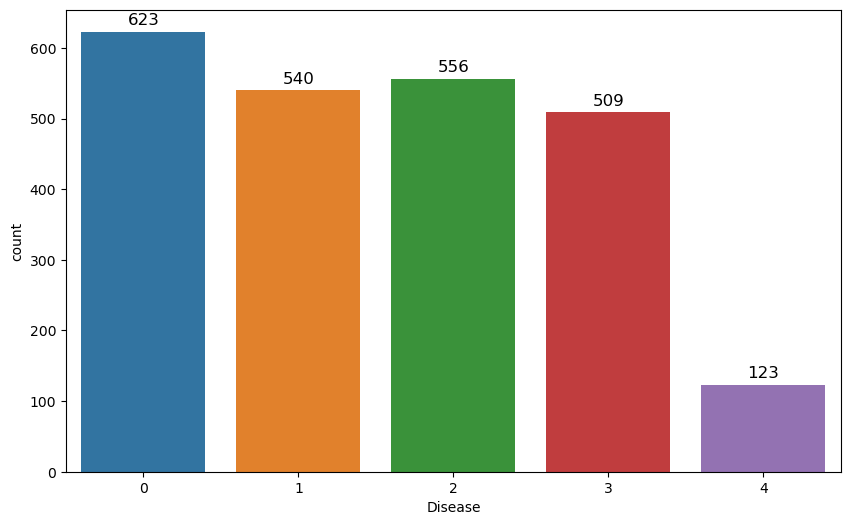

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Disease', data=data_train)

# Adding the count annotations on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show()

# # Separating the feature and target variable

In [14]:
# Spliting the dataset into features (X) and target variable (y)
X = data_train.drop('Disease', axis = 1)
y = data_train['Disease']

In [15]:
# Spliting the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Output the shapes of the resulting dataframes
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((1880, 24), (471, 24), (1880,), (471,))

The dataset was successfully split into training and testing sets with an 80-20 split, resulting in 1880 samples for training and 471 samples for testing. Each sample contains 24 features, and the target variable 'Disease' has been encoded into numerical labels for both training and testing sets. There are no missing values in the dataset. The data is now prepared for model training and evaluation to predict the disease category based on the given health attributes.

# Lets Handle Imbalance

### Initialize SMOTE

In [17]:
smote = SMOTE(random_state=42)

### Apply SMOTE to the training data

In [18]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [20]:
print(pd.Series(y_train).value_counts())

3    489
1    489
4    489
0    489
2    489
Name: Disease, dtype: int64


# Standard Scaler

In [21]:
# Appling standard scaling to get optimized result 
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Prediction 

### Using Logistic Regression

In [24]:
# Train the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [44]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the trained model to a file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the scaler to a file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [25]:
logistic_regression = LogisticRegression()

In [26]:
# Cross-validation
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(logistic_regression, X_train, y_train, cv=cv, scoring='f1_weighted')

In [27]:
print(f'Cross-validation F1-scores: {cross_val_scores}')
print(f'Mean Cross-validation F1-score: {cross_val_scores.mean()}')

Cross-validation F1-scores: [1. 1. 1. 1. 1.]
Mean Cross-validation F1-score: 1.0


In [28]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Predictions on the testing set
y_pred = logistic_regression.predict(X_test)

# Evaluation

In [30]:
# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred)
precision_logistic = precision_score(y_test, y_pred, average='weighted')
recall_logistic = recall_score(y_test, y_pred, average='weighted')
f1_logistic = f1_score(y_test, y_pred, average='weighted')
conf_matrix_logistic = confusion_matrix(y_test, y_pred)
class_report_logistic = classification_report(y_test, y_pred)

In [31]:
print("Logistic Regression Classifier Metrics:")
print(f"Accuracy: {accuracy_logistic}")
print(f"Precision: {precision_logistic}")
print(f"Recall: {recall_logistic}")
print(f"F1-score: {f1_logistic}")
print("Confusion Matrix:")
print(conf_matrix_logistic)
print("Classification Report:")
print(class_report_logistic)

Logistic Regression Classifier Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[134   0   0   0   0]
 [  0 112   0   0   0]
 [  0   0 102   0   0]
 [  0   0   0 103   0]
 [  0   0   0   0  20]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       112
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00       103
           4       1.00      1.00      1.00        20

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471



The output of our Logistic Regression classifier metrics indicates that the model has achieved perfect performance on the test set. Here’s a detailed insight into each metric and what this result implies:

**Perfect Classification:**

    -The model achieved a perfect score across all evaluation metrics (accuracy, precision, recall, and F1-score), indicating flawless performance in predicting the disease based on health attributes.

**Confusion Matrix Analysis:**

    The confusion matrix shows that the model correctly classified all instances without any errors. Each class (representing different diseases) has no false positives or false negatives, which is an ideal outcome in classification tasks.

### Using Random Forest

In [32]:
random_forest = RandomForestClassifier(n_estimators=200)
# Train the model
random_forest.fit(X_train, y_train)
# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test)

In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1_score = f1_score(y_test, y_pred_rf, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

In [34]:
print("Logistic Regression Classifier Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Logistic Regression Classifier Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[134   0   0   0   0]
 [  0 112   0   0   0]
 [  0   0 102   0   0]
 [  0   0   0 103   0]
 [  0   0   0   0  20]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       112
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00       103
           4       1.00      1.00      1.00        20

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471



## Predicting the likelyhood of patients

In [35]:
new_patient_data = {
    'Glucose': 0.739597, 
    'Cholesterol': 0.650198, 
    'Hemoglobin': 0.713631, 
    'Platelets': 0.868491, 
    'White Blood Cells': 0.687433, 
    'Red Blood Cells': 0.529895, 
    'Hematocrit': 0.290006, 
    'Mean Corpuscular Volume': 0.631045, 
    'Mean Corpuscular Hemoglobin': 0.001328, 
    'Mean Corpuscular Hemoglobin Concentration': 0.795829, 
    'Insulin': 0.512941, 
    'BMI': 0.856810, 
    'Systolic Blood Pressure': 0.402342, 
    'Diastolic Blood Pressure': 0.286307, 
    'Triglycerides': 0.348211, 
    'HbA1c': 0.502665, 
    'LDL Cholesterol': 0.215560, 
    'HDL Cholesterol': 0.512941, 
    'ALT': 0.064187, 
    'AST': 0.610827, 
    'Heart Rate': 0.939485, 
    'Creatinine': 0.095512, 
    'Troponin': 0.465957, 
    'C-reactive Protein': 0.769230
}

In [36]:
# Create a DataFrame for the new patient data
new_patient_df = pd.DataFrame([new_patient_data])

In [37]:
# Ensure columns match the training data
new_patient_df = new_patient_df[list(new_patient_data.keys())]

In [38]:
# Scale the new patient data using the fitted scaler
new_patient_scaled = scaler.transform(new_patient_df)

In [39]:
# Predict the likelihood of disease for the new patient
new_prediction = model.predict(new_patient_scaled)
new_prediction_proba = model.predict_proba(new_patient_scaled)

In [40]:
# Print the predicted disease and probabilities
predicted_disease = label_encoder.inverse_transform(new_prediction)
print(f'Predicted Disease: {predicted_disease[0]}')
print(f'Prediction Probabilities: {new_prediction_proba[0]}')

Predicted Disease: Healthy
Prediction Probabilities: [1.52029369e-02 7.59507023e-07 6.77551382e-01 3.07131414e-01
 1.13507646e-04]
